**1- Préparation du data et extraction des donnée utiles** 

---
on Commence de charger le dataset pour la convertir en des données manipulable pour les traiter après 
on segmente chaque morceau en plusieurs morceau et pour chacun on extrait les MFCC pour chaque instant On obtient ainsi une liste tridimmensionnelle sa forme est [nb_data , nb_fenetre , n_mfcc ]




In [0]:
import json
import os
import math
import librosa

DATASET_PATH = "le chemin vers notre dataset"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30  # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extrait MFCCs de la musique du dataset et les enregister sous forme d'un fichier avec leurs labels.
        :param dataset_path (str): le chemin vers notre dataset
        :param json_path (str): le chemin vers notre fichier json
        :param num_mfcc (int): nombre de coefficient MFCC à extraire
        :param n_fft (int): Intervalle à consider pour appliquer le FFT. Mesuré en # d'échantillons
        :param hop_length (int): Sliding window de FFT. Mesuré en # d'échantillons
        :param: num_segments (int): Nombre de segments dans lesquels nous voulons diviser les pistes
        :return:
        """

    # dictionary pour enregistrer mapping, labels, et MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # boucler suivant tous les sous dossier des genres
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensurer on parcours un dossier du genre
        if dirpath is not dataset_path:

            # enregistrer l'étiquette de genre (c'est-à-dire le nom du sous-dossier) dans le mapping
            semantic_label = dirpath.split("\\")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # traiter tous les fichier dans genre sub-dir
            for f in filenames:

                # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                
                for d in range(num_segments):

                    # calculer le debut et la fin de chaque segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extraire mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                                hop_length=hop_length)
                    mfcc = mfcc.T

                    # enregistrer le MFCC
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i - 1)
                        print("{}, segment:{}".format(file_path, d + 1))

    # enregistrer le data en json
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

**Load_data definition**
# creer la fonction du chargement du data

In [0]:
def load_data(data_path):
    """charger le contenu du json fichier
        :param data_path (str): le chemin vers le fichier json
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convertir lists vers numpy array
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return X, y


def plot_history(history):
    """Plots accuracy/loss pour l'entrainement et validation 
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)
    fig.tight_layout(pad=3.0)

    # creer accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # creer error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Data succesfully loaded!
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               865792    
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_28 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
219/219 [==============================] - 2s 11ms/step - loss: 4.9384 - 

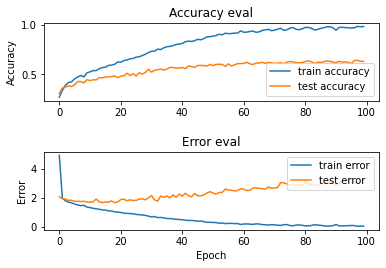

219/219 - 1s - loss: 0.0343 - accuracy: 0.9886
94/94 - 0s - loss: 3.1736 - accuracy: 0.6299

Test accuracy: 0.6298766136169434

Train accuracy: 0.988566517829895


In [18]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt


DATA_PATH = "/content/drive/My Drive/Colab Notebooks/data/data_10.json"


if __name__ == "__main__":

    
    X, y = load_data(DATA_PATH)

   #separer le dataset en data d'entrainement et data de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # creer la topology du reseau
    model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

     
        keras.layers.Dense(512, activation='relu'),


   
        keras.layers.Dense(256, activation='relu'),


    
        keras.layers.Dense(64, activation='relu'),
        
        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])

    # compiler le model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

    # plot accuracy and error as a function of the epochs
    plot_history(history)
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)
    print('\nTrain accuracy:', train_acc)

**Creation d'un multiLayer perceptron pour faire la classification**

Data succesfully loaded!
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 1690)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               865792    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_22 (Dropout)        

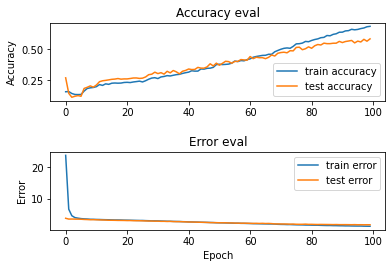

219/219 - 1s - loss: 0.9225 - accuracy: 0.7879
94/94 - 0s - loss: 1.6557 - accuracy: 0.5832

Test accuracy: 0.583194375038147

Train accuracy: 0.7879090905189514


In [22]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt


DATA_PATH = "/content/drive/My Drive/Colab Notebooks/data/data_10.json"


if __name__ == "__main__":

    
    X, y = load_data(DATA_PATH)

   #separer le dataset en data d'entrainement et data de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # creer la topology du reseau
    model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

     
        keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

   
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

    
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])

    # compiler le model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

    # plot accuracy and error as a function of the epochs
    plot_history(history)
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)
    print('\nTrain accuracy:', train_acc)

**Creation de la fonction qui prepare le dataset pour le CNN**

In [0]:
def prepare_datasets(test_size, validation_size):
    
  
    X, y = load_data(DATA_PATH)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [0]:
def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))

**Create the CNN topology**

Data succesfully loaded!
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_14 (Conv2D)          

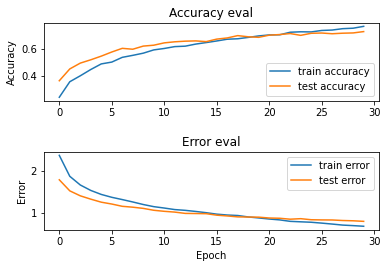

79/79 - 1s - loss: 0.7904 - accuracy: 0.7275
188/188 - 3s - loss: 0.4746 - accuracy: 0.8464

Train accuracy: 0.8464232087135315

Test accuracy: 0.727491021156311
Target: 1, Predicted label: [1]


In [21]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

SAVED_MODEL_PATH = "/content/drive/My Drive/Colab Notebooks/data/model.h5"




def build_model(input_shape):
    


    model = keras.Sequential()

   
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

 
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

 
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())


    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))


    model.add(keras.layers.Dense(10, activation='softmax'))

    return model





if __name__ == "__main__":

 
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

  
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

 
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()


    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)
    model.save(SAVED_MODEL_PATH)
    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
    print('\nTrain accuracy:', train_acc)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    # predict sample
    predict(model, X_to_predict, y_to_predict)

In [0]:
import librosa
import tensorflow as tf
import numpy as np


SAMPLES_TO_CONSIDER = 22050 * 3 

class _Music_Classification_Service:
    

    model = None
    _mapping = [
        "blues",
        "classical",
        "country",
        "disco",
        "hiphop",
        "jazz",
        "metal",
        "pop",
        "reggae",
        "rock"
        
    ]
    _instance = None


    def predict(self, file_path):
       

        # extract MFCC
        MFCCs = self.preprocess(file_path)
        # we need a 4-dim array to feed to the model for prediction: (# samples, # time steps, # coefficients, 1)
        MFCCs = MFCCs[np.newaxis, ..., np.newaxis]

        # get the predicted label
        predictions = self.model.predict(MFCCs)
        predicted_index = np.argmax(predictions)
        predicted_genre = self._mapping[predicted_index]
        return predicted_genre


    def preprocess(self, file_path, num_mfcc=13, n_fft=2048, hop_length=512):
       

        # load audio file
        signal, sample_rate = librosa.load(file_path)

        if len(signal) >= SAMPLES_TO_CONSIDER:
            # ensure consistency of the length of the signal
            signal = signal[:SAMPLES_TO_CONSIDER]

            # extract MFCCs
            MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                         hop_length=hop_length)
        return MFCCs.T


def Music_Classification_Service():
  
    # ensure an instance is created only the first time the factory function is called
    if _Music_Classification_Service._instance is None:
        _Music_Classification_Service._instance = _Music_Classification_Service()
        _Music_Classification_Service.model = tf.keras.models.load_model(SAVED_MODEL_PATH)
    return _Music_Classification_Service._instance




if __name__ == "__main__":

    # create 2 instances of the keyword spotting service
    mcs = Music_Classification_Service()
    mcs1 = Music_Classification_Service()

    # check that different instances of the keyword spotting service point back to the same object (singleton)
    assert mcs is mcs1

    # make a prediction
    genre = mcs.predict("/content/drive/My Drive/Colab Notebooks/data/pop.00005.wav")
    print(genre)

pop
